## Esercizio Classificazione NLP3 - Disaster Twitter Prediction



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/disaster.jpg" width="1200">

In [49]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/twitter_train.csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df.shape

(7613, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
df['text'][df['target']==1]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

In [29]:
patterns = {
            r'\s+': ' ',            # prima e dopo come ultima sostituisce tutti i multipli spazi con uno spazio
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

words_to_remove = ['https', 'amp']

word_pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
patterns[word_pattern] = ''

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement,regex= True)
        df[column] = df[column].str.lower() # applica il lower
    return df

df = clean_column(df, 'text', patterns)


In [30]:
df['text'].head()

0    our deeds are the reason this earthquake may a...
1                   forest fire near ronge sask canada
2    all residents asked shelter place are being no...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska smok...
Name: text, dtype: object

In [31]:
text = " ".join(row for row in df['text'][df['target']==1])

In [32]:
wordcloud = WordCloud(stopwords = STOPWORDS)#stopwords = STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

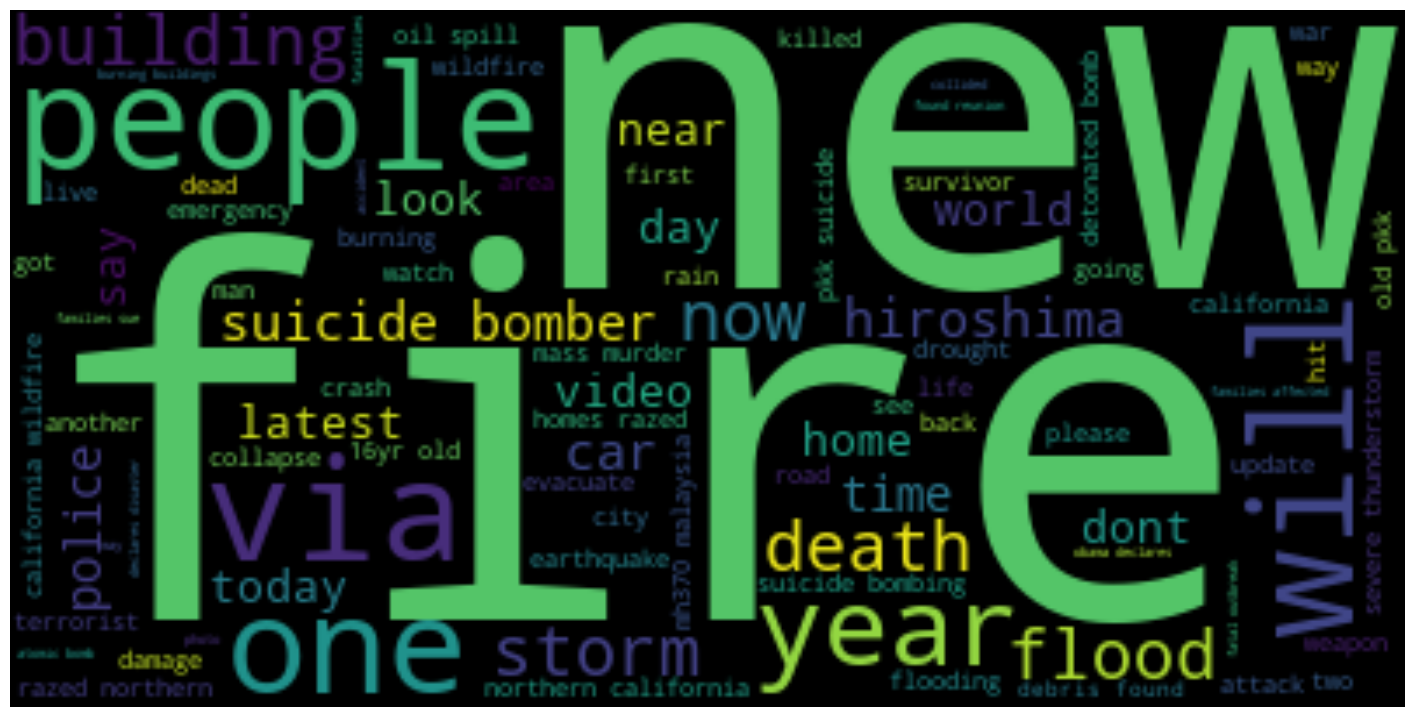

In [33]:
wordcloud.generate(text)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [34]:
X= df['text']
y = df['target']

In [38]:
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

In [39]:
tfi = TfidfTransformer()
X_tfi = tfi.fit_transform(X_counts)

In [41]:
X_train, X_test,y_train, y_test = train_test_split(X_tfi,y,stratify=y,test_size=0.3,random_state=42)

In [44]:
model = LogisticRegression(penalty='l2').fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8021015761821366

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1303
           1       0.85      0.66      0.74       981

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [ ]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
## STEP 2 : EDA con WORDCLOUD
##STEP 3: Definizre X e y (features testuali e Target)
##STEP 4: Vettorizzazione - Bag of Words
##STEP 5: TF-IDF
##STEP 6: Split Training and Test
##STEP 7: Modellazione
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)

In [48]:
naive = MultinomialNB().fit(X_train,y_train)
y_pred_nb = naive.predict(X_test)
print(naive.score(X_test,y_test))
print(classification_report(y_test,y_pred_nb))

0.8117338003502627
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1303
           1       0.87      0.66      0.75       981

    accuracy                           0.81      2284
   macro avg       0.83      0.79      0.80      2284
weighted avg       0.82      0.81      0.81      2284



In [50]:
clf = RandomForestClassifier().fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)
print(clf.score(X_test,y_test))
print(classification_report(y_test,y_pred_clf))

0.7924693520140105
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1303
           1       0.86      0.61      0.72       981

    accuracy                           0.79      2284
   macro avg       0.81      0.77      0.78      2284
weighted avg       0.80      0.79      0.79      2284

